# NUTRITION WEIGHT ACTIVITY
* import
* analze
* 

In [15]:
# import packages

import numpy as np
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.width = 1000
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
# comment out line below in VSCode
%matplotlib inline

# VSCode requires print() for all displays

In [16]:
# explore weights
dfw = pd.read_csv('Weights2019-02-16 (6621).csv')


In [17]:
dfw.head();

In [18]:
dfw.tail();

In [20]:
dfw.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
Date      169 non-null object
Weight    169 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


### Need to make Date as datetime format, reverse order, and index

In [21]:
# as datetime
dfw['Date'] = pd.to_datetime(dfw['Date'])

In [22]:
# check
dfw.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
Date      169 non-null datetime64[ns]
Weight    169 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


In [23]:
# set as index
dfw.set_index(dfw['Date'], inplace = True)

In [24]:
# check
dfw.head();

In [25]:
# drop Excess date columns
dfw.drop(['Date'], axis=1, inplace=True)

In [26]:
dfw1 = dfw.iloc[::-1]

In [27]:
dfw1.drop(dfw1.index[:10], inplace=True)

In [29]:
print(dfw1.head())
print(dfw1.tail())

            Weight
Date              
2018-07-28   233.2
2018-07-29   232.4
2018-07-30   231.8
2018-07-31   232.0
2018-08-04   231.8
            Weight
Date              
2019-02-11   204.4
2019-02-13   202.2
2019-02-14   202.2
2019-02-15   202.4
2019-02-16   207.0


/Users/artrodriguez/.local/share/virtualenvs/nutrition_and_activity-9buAQDj7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


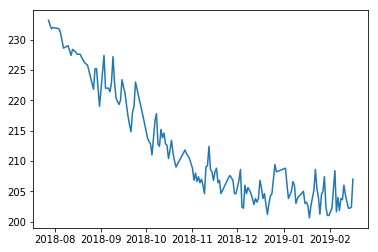

In [30]:
plt.plot(dfw1['Weight'])
plt.show()

In [62]:
# import nutrition

import os

os.chdir('/Users/artrodriguez/Desktop/all_projects/nutrition_and_activity/nutrition')

#dfs = [pd.read_csv(f, index_col=[0], parse_dates=[0], header=None)
#        for f in os.listdir(os.getcwd()) if f.endswith('csv')]

dfs = [pd.read_csv(f, header=None)
        for f in os.listdir(os.getcwd()) if f.endswith('csv')]

finaldf = pd.concat(dfs, axis=0, join='inner').sort_index()

In [64]:
finaldf.sort_index(ascending=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)


In [61]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3373 entries, 01/01/2019 to Date
Data columns (total 13 columns):
1     3373 non-null object
2     3373 non-null object
3     3373 non-null object
4     3373 non-null object
5     3373 non-null object
6     2917 non-null object
7     2911 non-null object
8     2932 non-null object
9     2741 non-null object
10    2729 non-null object
11    2755 non-null object
12    2683 non-null object
13    2796 non-null object
dtypes: object(13)
memory usage: 368.9+ KB
